In [5]:
import pandas as pd
news = pd.read_csv('news_mod_0.csv',index_col="ID")

In [6]:
news

,CATEGORY,PUBLISHER,genre,TITLE,uri,story,uri_features,month,date,day,time,ts
ID,,,,,,,,,,,,
13,b,Reuters,article,Europe reaches crunch point on banking union,"eu,banks,resoluton",0,INL6N0M71NJ,3,10,Mon,0,8640.0
14,b,Reuters,article,ECB FOCUS-Stronger euro drowns out ECB's messa...,"ecb,policy",0,INL6N0M71K3,3,10,Mon,0,8640.0
20,b,Businessweek,news,"Euro Anxieties Wane as Bunds Top Treasuries, S...","german,bonds,beat,treasuries,with,yield,spread...",0,NaN,3,10,Mon,0,8640.0
21,b,Businessweek,news,Noyer Says Strong Euro Creates Unwarranted Eco...,"noyer,says,stronger,euro,creates,unwarranted,p...",0,NaN,3,10,Mon,0,8640.0
30,b,Reuters,article,REFILE-Bad loan triggers key feature in ECB ba...,"eurozone,bank,tests",0,INL6N0M71F0,3,10,Mon,0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...
422819,m,Huffington Post,hp,UN: Ebola Could Eventually Infect 20000 People,"ebola,20000,people",4577,NaN,8,28,Thu,0,254880.0
422820,m,Reuters,article,"Ebola toll tops 1550, continues to accelerate ...","health,ebola,toll",4577,INL5N0QY2GR,8,28,Thu,0,254880.0
422821,m,Reuters,article,"UPDATE 1-Ebola toll tops 1550, outbreak accele...","health,ebola,toll",4577,INL5N0QY2J7,8,28,Thu,0,254880.0


In [7]:
news['TITLE'] = news['TITLE'].apply(lambda title:title.replace('-',' '))

In [8]:
news['uri'] = news['uri'].apply(lambda uri:' '.join(uri.split(',')) if type(uri) is not float else "")

In [9]:
news

,CATEGORY,PUBLISHER,genre,TITLE,uri,story,uri_features,month,date,day,time,ts
ID,,,,,,,,,,,,
13,b,Reuters,article,Europe reaches crunch point on banking union,eu banks resoluton,0,INL6N0M71NJ,3,10,Mon,0,8640.0
14,b,Reuters,article,ECB FOCUS Stronger euro drowns out ECB's messa...,ecb policy,0,INL6N0M71K3,3,10,Mon,0,8640.0
20,b,Businessweek,news,"Euro Anxieties Wane as Bunds Top Treasuries, S...",german bonds beat treasuries with yield spread...,0,NaN,3,10,Mon,0,8640.0
21,b,Businessweek,news,Noyer Says Strong Euro Creates Unwarranted Eco...,noyer says stronger euro creates unwarranted p...,0,NaN,3,10,Mon,0,8640.0
30,b,Reuters,article,REFILE Bad loan triggers key feature in ECB ba...,eurozone bank tests,0,INL6N0M71F0,3,10,Mon,0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...
422819,m,Huffington Post,hp,UN: Ebola Could Eventually Infect 20000 People,ebola 20000 people,4577,NaN,8,28,Thu,0,254880.0
422820,m,Reuters,article,"Ebola toll tops 1550, continues to accelerate ...",health ebola toll,4577,INL5N0QY2GR,8,28,Thu,0,254880.0
422821,m,Reuters,article,"UPDATE 1 Ebola toll tops 1550, outbreak accele...",health ebola toll,4577,INL5N0QY2J7,8,28,Thu,0,254880.0


In [10]:
from stemming.porter2 import stem

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
news['title_lemma'] = news['TITLE'].apply(lambda title:[stem(e.lemma_.lower()) for e in nlp(title) if not (e.is_stop or e.like_num or e.is_quote or e.is_bracket or e.is_currency)])
news['uri_lemma'] = news['uri'].apply(lambda title:[stem(e.lemma_.lower()) for e in nlp(title) if not (e.is_stop or e.like_num or e.is_quote or e.is_bracket or e.is_currency)])

In [13]:
dic = {}
for _, row in news.iterrows():
    for w in set(row['title_lemma']+row['uri_lemma']):
        if w in [" ",",",":",";","  ",".","..."]: continue
        dic.setdefault(w,0)
        dic[w] += 1

In [14]:
len(dic)

11597

(array([4352.,    0., 1680.,    0.,  939.,    0.,  675.,    0.,  480.,
           0.,  365.,    0.,  265.,    0.,  212.,    0.,  216.,    0.,
         164.,    0.,  169.,    0.,  142.,    0.,    0.,  110.,    0.,
          95.,    0.,  104.,    0.,   84.,    0.,   70.,    0.,   65.,
           0.,   58.,    0.,   50.,    0.,   53.,    0.,   57.,    0.,
          58.,    0.,   40.,    0.,   40.]),
 array([ 1.  ,  1.48,  1.96,  2.44,  2.92,  3.4 ,  3.88,  4.36,  4.84,
         5.32,  5.8 ,  6.28,  6.76,  7.24,  7.72,  8.2 ,  8.68,  9.16,
         9.64, 10.12, 10.6 , 11.08, 11.56, 12.04, 12.52, 13.  , 13.48,
        13.96, 14.44, 14.92, 15.4 , 15.88, 16.36, 16.84, 17.32, 17.8 ,
        18.28, 18.76, 19.24, 19.72, 20.2 , 20.68, 21.16, 21.64, 22.12,
        22.6 , 23.08, 23.56, 24.04, 24.52, 25.  ]),
 <a list of 50 Patch objects>)

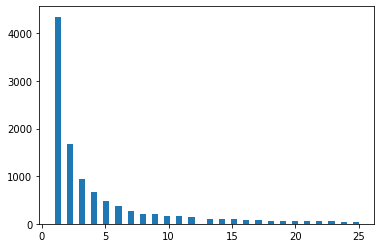

In [15]:
import matplotlib.pyplot as plt
plt.hist(dic.values(),bins=50, range=(1,25))

In [16]:
dic = {k:v for k,v in dic.items() if v>7}
len(dic)

2841

In [17]:
from tqdm import tqdm

In [18]:
for w in tqdm(dic.keys()):
    news["f_"+w] = news[['title_lemma','uri_lemma']].apply(lambda row: int(w in row['title_lemma']+row['uri_lemma']),axis=1)

100%|██████████| 2841/2841 [20:02<00:00,  2.36it/s]


In [20]:
news.to_csv('news_mod_spacy_simple.csv')

In [16]:
news['title_parse'] = news['TITLE'].apply(lambda title:[(elm,elm.label_) for elm in nlp(title).ents])

In [17]:
news['title_parse']

ID
13                                        [((Europe), LOC)]
14                                                       []
20                                         [((Spain), GPE)]
21                                        [((1), CARDINAL)]
30                  [((REFILE, -, Bad), ORG), ((ECB), ORG)]
                                ...                        
422819                   [((UN), ORG), ((20000), CARDINAL)]
422820                                     [((1550), DATE)]
422821                    [((UPDATE), ORG), ((1550), DATE)]
422828                                       [((WHO), ORG)]
422838    [((France), GPE), ((Sierra, Leone), ORG), ((Fr...
Name: title_parse, Length: 13340, dtype: object

In [18]:
print(news.loc[13,'title_parse'])

[(Europe, 'LOC')]


In [60]:
list(news.loc[13,'title_parse'])

[Tree('GPE', [('Europe', 'NNP')]),
 ('reaches', 'VBZ'),
 ('crunch', 'NN'),
 ('point', 'NN'),
 ('on', 'IN'),
 ('banking', 'NN'),
 ('union', 'NN')]

## Named entity
ORGANIZATION	Georgia-Pacific Corp., WHO
PERSON	Eddy Bonte, President Obama
LOCATION	Murray River, Mount Everest
DATE	June, 2008-06-29
TIME	two fifty a m, 1:30 p.m.
MONEY	175 million Canadian Dollars, GBP 10.40
PERCENT	twenty pct, 18.75 %
FACILITY	Washington Monument, Stonehenge
GPE South East Asia, Midlothian

In [51]:
s = set()
for tp in news['title_parse']:
    for elm in tp:
        if type(elm) == tuple: continue
        if len(list(elm)[0])<2: print(tp,elm,type(elm),list(elm)[0])
        s.add(list(elm)[0][1])

In [52]:
s

{'CC',
 'CD',
 'DT',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PRP',
 'RB',
 'SYM',
 'TO',
 'VB',
 'VBD',
 'VBN',
 'VBZ'}

In [19]:
news['title_parse'].apply(lambda li:[elm for elm in li])

ID
13        [[(Europe, NNP)], (reaches, VBZ), (crunch, NN)...
14        [[(ECB, NNP)], (FOCUS-Stronger, NNP), (euro, N...
20        [[(Euro, NNP)], [(Anxieties, NNP), (Wane, NNP)...
21        [[(Noyer, NNP)], (Says, VBZ), [(Strong, NNP), ...
30        [(REFILE-Bad, JJ), (loan, NN), (triggers, NNS)...
                                ...                        
422819    [(UN, NN), (:, :), [(Ebola, NNP), (Could, NNP)...
422820    [[(Ebola, NNP)], (toll, NN), (tops, NN), (1550...
422821    [(UPDATE, IN), (1-Ebola, JJ), (toll, NN), (top...
422828    [[(Ebola, NNP)], [(Cases, NNP), (May, NNP)], (...
422838    [[(Air, NNP)], [(France, NNP)], (suspends, VBZ...
Name: title_parse, Length: 13340, dtype: object